<img src="https://elitedatascience.com/wp-content/uploads/2018/05/What-Goes-Into-a-Successful-Model.jpg">

In [82]:
import pandas as pd
import numpy as np
housing_data = pd.read_csv("housing.csv")
housing_data_original = pd.read_csv("housing.csv")

In [81]:
housing_data.loc[np.isnan(housing_data['total_bedrooms']),:] #Locates instances whose value is "nan" for total_bedrooms

housing_data.info() # Here we get an overview of our data such as the # of entries per column and value type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Looking at the total_bedrooms attribute, we can see that it has less entries than the other attributes (20433 vs 20640).
## As we learned, this is an example of poor data quality and could result in poor perfromance.
In order to fix this we can either:

- 1) remove the instances with missing features
- 2) ignore the feature (total_bedrooms) if it's not significant
- 3) Fill in the missing values using a strategy (i.e. with the median)
- 4) train the model with/without the feature

We will choose option 3 (and possibly option 4).

In [312]:
import numpy as np #we import numpy to convert our pd.array to an np.array
from sklearn.impute import SimpleImputer #SimpleImputer will fill-in the "nan" values
imputer = SimpleImputer(strategy="median") #Our fill-in strategy is to used the median

"Below we extract our total_bedroom instances to perform the transformation of missing values"
total_bedrooms = np.array(housing_data["total_bedrooms"])

"""
Here we fit and transform our data by filling missing values with the median. 
We reshaped our numpy aarray from a 1D array to 2D per the requirements for the SimpleImputer object.
"""

fixed_total_bedrooms = imputer.fit_transform(total_bedrooms.reshape(-1,1))

"Now, we add the new transformed instances back into the original dataset"
housing_data['total_bedrooms'] = fixed_total_bedrooms

Now, We will convert our categorical data to numbers by using OneHotEncoder and LabelEncoder
And determine which is the best solution. LabelBinazer can do what both can do and therefore might be more efficient.

## What's the difference?

<B>LabelEncoder</B> - encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

<img src="https://i.imgur.com/tEogUAr.png">

Here we see that the labels received the following codes:

- Never =>  0
- Rarely     =>  1
- Most Days  =>  2
- Everyday   =>  3


The problem here is since there are different numbers in the same column, the model will misunderstand the data to be in some kind of order, 0 < 1 <2.

## <B>What's the solution?</B>


<B>OneHotEncoder</B> - Instead of getting columns with unique values for the number of distinct labels, it uses a sparse matrix which is computationally more efficient and less intensive on storage as it only stores information about our non-zero elements.

<B>Why?</B>

Representing a sparse matrix by a 2D array with zero and non-zero elements leads to wastage of lots of memory as zeroes in the matrix are of no use in most cases. So, instead of storing zeroes with non-zero elements, we only store non-zero elements <B> (See Image Below) </B>.

## <font color="red"><B>In our image below, the condensed sparse matrix elements stores the non-zero elements while the dense matrix includes them both (zero and non-zero) which requires more storage</B></font> 

<img src="https://matteding.github.io/images/sparse_dense.gif">

If needed we can convert our sparse matrix to a dense matrix by adding toarray() to our OneHotEncoder:

### <font color="blue"><i>one_encoder.fit_transform(np.array(housing_cat).reshape(-1,1)).toarray()</i></font>

https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/

In [115]:
housing_cat=housing_data['ocean_proximity']

In [246]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit_transform(housing_cat)

array([3, 3, 3, ..., 1, 1, 1])

When initiating an OneHotEncoder object, we have to do the following:
<B>
1. Remap our pandas.series one-dimensional array to a 2D numpy array
2. (optional). If you want to transform your compressed sparse matrix to a dense-matrix add the toarray() method to your encoder transformer as below:</B>
    

In [248]:
from sklearn.preprocessing import OneHotEncoder
one_encoder = OneHotEncoder()
one_encoder.fit_transform(np.array(housing_cat).reshape(-1,1)) #compressed sparse matrix
one_encoder.fit_transform(np.array(housing_cat).reshape(-1,1)).toarray() #dense matrix

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

With the LabelBinarizer object we can create either a condensed sparse matrix or a dense matriz by setting the sparse_output argument to <font color="green"><B>True</B></font> (condensed sparse matrix) or <font color="green"><B>False</B></font> (for a dense matrix)

Ex:

- LabelBinarizer(sparse_output=<font color="green"><B>False</B></font>)
- LabelBinarizer(sparse_output=<font color="green"><B>True</B></font>)

In [252]:
from sklearn.preprocessing import LabelBinarizer
label_bin_dense = LabelBinarizer(sparse_output=False)
label_bin_sparse = LabelBinarizer(sparse_output=True)

In [377]:
label_bin_dense.fit_transform(np.array(housing_cat).reshape(-1,1))
label_bin_sparse.fit_transform(np.array(housing_cat).reshape(-1,1))

<20640x5 sparse matrix of type '<class 'numpy.int32'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [375]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Continuing with the clean-up process, we can now prepare our data for stratified sampling. We determined that median_income was one of our most important variables due to it's high correlation with median_house_value.

<font size="4">Stratified sampling is a sampling method that breaks a population into smaller subgroups ("strata") and then uses simple random sampling in each stratum. It is commonly used to sample from long tailed distributions (e.g. data on the internet). Thus, we will convert our median_income into sub-groups (categories) ranging from 1-5. We will terminate our category at 5 and as a result, all the possible categories >5 (which is a small amount) will be part of 5. We will also shrink our category values to reduce the range </font>


In [423]:
income_cat = housing_data['median_income']

Below we observe our income categorie and notice the range from 1 to 11, with most of our values falling in the range of 1 - 5.

In [425]:
income_cat.value_counts()

3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
           ..
4.1514      1
1.2614      1
2.0294      1
6.7079      1
3.7306      1
Name: median_income, Length: 12928, dtype: int64

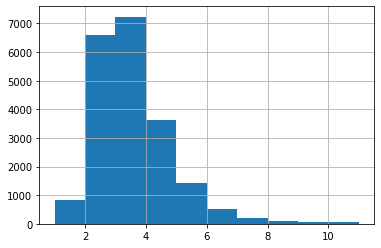

In [427]:
income_cat.hist()

We will now shrink our values to help reduce the range of the higher number

In [426]:
income_cat = np.ceil(income_cat / 1.5)

<font size="3" >Now we will group our categories in the range of 1 to 5, where all categories > 5 will be mapped to 5 using the numpy's built-in <B>where()</B> method</font>

##### <font size="3" >where(cond, other=nan, inplace=False, axis=None, level=None, errors='raise', try_cast=False) </font>

<font size="3" >Where() `cond` is True, keep the original value. Where False, replace with corresponding value from `other`. </font>

In [437]:
income_cat.where(income_cat < 5, 5, inplace=True)

- #### <font sizt="3"> Now we can see that are categories are in the range of 1 to 5 </font>

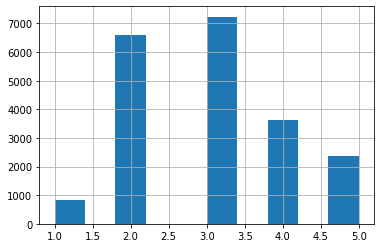

In [440]:
income_cat.hist()

We will now start our stratified sampling. Our stratified object will give us the strata indicies and create our X and y training and test sets

In [455]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)


for train_index, test_index in sss.split(housing_data, income_cat):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = housing_data.loc[train_index], housing_data.loc[test_index]
    y_train, y_test = housing_data['median_income'][train_index], housing_data['median_income'][train_index]

TRAIN: [17606 18632 14650 ... 13908 11159 15775] TEST: [ 5241 10970 20351 ...  4019 12107  2398]



------

# <center>Automating Our Preprocessing Steps</center>

- ### Now we can proceed to the final steps in our data processing. Given that we have conducted a number of steps, it would be inefficient if we followed these manual steps each time.

- ### Therefore, we will automate these steps so we don't have to always reinvent the wheel!
- ### We will achieve automation using sklearn's Pipeline object which sequentially apply a list of transforms and a final estimator to our data.
-----

- ### First, we create a class that will extract our dataFrame columns by datatype which is built-in to Panda's dataframes

In [471]:
from sklearn.base import BaseEstimator, TransformerMixin


class DataFrameByDtype(BaseEstimator, TransformerMixin):
    def __init__(self, numeric=True):
        self.numeric = numeric
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        if numeric:
            return X.select_dtypes("float")
        else:
            return X.select_dtypes("O")

-----
### Now we can include our feature engineering class which will be responsible for transforming our data before we feed it to our ML model with the purpose of making it more accurate.
-----

### Below we create our <font color='blue' size = "4"><B>CombinedAttributesAdder</B></font> class which does the following:


- <font size="3">It targets particular attributes such as "total_rooms", "total_bedrooms", "population", and "households"
- The associated column numbers for the attributes above are assigned to variable
- In our <B>transform()</B> method, we develop the following new features by combining existing features:
    - <B>rooms_per_household = total_rooms / households</B>
    - <B>population_per_household = population / household</B>
    - We also create <B>bedrooms_per_room = total_bedrooms/total_rooms</B> if add_bedrooms_per_room is <font color="green">True</font>
</font>

In [486]:
from sklearn.base import BaseEstimator, TransformerMixin 
rooms_ix, bedrooms_ix, population_ix, household_ix = "total_rooms", "total_bedrooms", "population", "households"

class CombinedAttributesAdder(BaseEstimator, TransformerMixin): 
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs 
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    def fit(self, X, y=None): 
        return self # nothing else to do 
    def transform(self, X, y=None): 
        X['rooms_per_household'] = X[rooms_ix] / X[household_ix] 
        X['population_per_household'] = X[population_ix] / X[household_ix] 
        if self.add_bedrooms_per_room:
            X['bedrooms_per_room'] = X[bedrooms_ix] / X[rooms_ix]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)

#pd.DataFrame(attr_adder.fit_transform(housing_data.values))

attr_adder.fit_transform(housing_data)

In [489]:
housing_data.corr()['median_income']

longitude                  -0.015176
latitude                   -0.079809
housing_median_age         -0.119034
total_rooms                 0.198050
total_bedrooms             -0.007617
population                  0.004834
households                  0.013033
median_income               1.000000
median_house_value          0.688075
rooms_per_household         0.326895
population_per_household    0.018766
bedrooms_per_room          -0.545298
Name: median_income, dtype: float64